<a href="https://colab.research.google.com/github/vinayshanbhag/Colaboratory/blob/master/Affine_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In geometry, an affine transformation is a function between affine spaces which preserves points, straight lines and planes.

An affine transformation preserves:

* collinearity between points: three or more points which lie on the same line (called collinear points) continue to be collinear after the transformation.
* parallelism: two or more lines which are parallel, continue to be parallel after the transformation.
* convexity of sets: a convex set continues to be convex after the transformation. Moreover, the extreme points of the original set are mapped to the extreme points of the transformed set.
* ratios of lengths of parallel line segments.
* barycenters of weighted collections of points.

In digital image processing, affine transformations are analogous to printing on a sheet of rubber and stretching the sheet's edges parallel to the plane. Affine transformations scale, rotate, translate, reflect and shear images



In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import sin, cos, tan, pi
import string
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Utility function to draw a matrix of row vectors
def draw(m, names = string.ascii_uppercase, title="", linecolor='lightgray', linestyle='dotted'):
  """plot row vectors from matrix m"""
  colors = 'rgbcmyk'#[color for color in mcolors.TABLEAU_COLORS]
  pts_x = []
  pts_y = []
  for idx, row in enumerate(m):
      x, y, _ = row
      pts_x.append(x)
      pts_y.append(y)
      plt.scatter(x, y, color=colors[idx%len(colors)])
      xpos = x+0.5 if x > 0 else x-0.5
      ypos = y+0.9 if y > 0 else y-0.9
      plt.text(xpos, ypos, f"{names[idx]} ({x:{'0.0f' if int(x)==x else '.2f'}},{y:{'0.0f' if int(y)==y else '.2f'}})")
  pts_x.append(pts_x[0])
  pts_y.append(pts_y[0])
  plt.plot(pts_x, pts_y, color=linecolor, linestyle=linestyle);
  scale = int(max(abs(m.min()),abs(m.max())));
  padding = 1
  plt.xlim(-scale-padding, scale+padding)
  plt.ylim(-scale-padding, scale+padding)
  plt.xticks(np.arange(-scale-padding, scale+padding, 1))
  plt.yticks(np.arange(-scale-padding, scale+padding, 1))
  ax = plt.gca().set_aspect('equal', adjustable='box')
  plt.axis('off')
  plt.title(title);

### Affine Transformations

Let M be a matrix of _**row**_ vectors as shown below.

\begin{equation*}
  M = 
  \begin{bmatrix}
    2&1&0\\
    2&-1&0\\
    -2&-1&0\\
    -2&1&0
  \end{bmatrix}
\end{equation*}

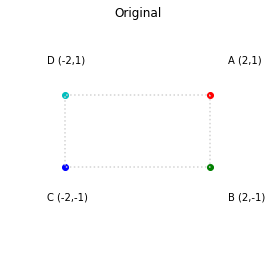

In [65]:
a,b,c,d = [2,1,0],[2,-1,0],[-2,-1,0],[-2,1,0]
M = np.array([a,b,c,d])
draw(M, title="Original")

#### Scaling

The original row vectors can be scaled by multiplying the matrix with an affine scaling matrix.

\begin{equation*}
  M
  *
  \begin{bmatrix}
    w & 0  & 0 \\ 0 & h  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  \end{equation*}

where w is scale factor in x direction and h the scale factor in y.


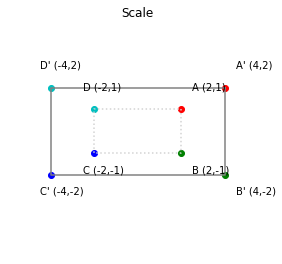

In [66]:
# Scale
scale = lambda w=1,h=1: np.array([[w,0,0],[0,h,0],[0,0,1]])
draw(M)
draw(M @ scale(2,2), names=[f"{n}'" for n in string.ascii_uppercase], title="Scale", linecolor='gray', linestyle='solid')

#### Rotation

The original row vectors can be rotated by multiplying the matrix with an affine scaling matrix.

\begin{equation*}
  M
  *
  \begin{bmatrix}
    cos(\theta) & sin(\theta)  & 0 \\ -sin(\theta) & cos(\theta)  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  \end{equation*}

where $\theta$ is the angle of rotation in radians.


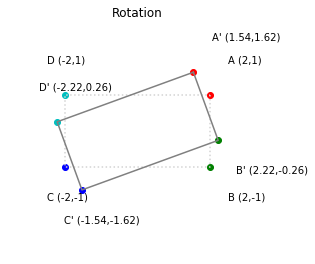

In [67]:
# Rotation matrix - rotate by theta radians
rot = lambda theta: np.array([[cos(theta) ,sin(theta),0],
                              [-sin(theta),cos(theta),0],
                              [0          ,0         ,1]
                             ])
draw(M)
draw(M @ rot(pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Rotation", linecolor='gray', linestyle='solid')

#### Reflection

The original row vectors can be reflected along x axis by multiplying the matrix with an affine reflection matrix.

\begin{equation*}
  M
  *
  \begin{bmatrix}
    1 & 0  & 0 \\ 0 & -1  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  \end{equation*}


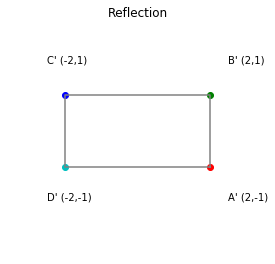

In [68]:
# Affine matrix for reflection

# Reflect around x axis, y axis or both
reflect = lambda x=1,y=1: np.array([
    [ y, 0,0],
    [ 0, x,0],
    [ 0, 0,1]
])

draw(M @ reflect(-1), names=[f"{n}'" for n in string.ascii_uppercase], title="Reflection", linecolor='gray', linestyle='solid')

#### Shear

The original row vectors can be sheared along x and/or y axis by multiplying the matrix with an affine shear matrix.

\begin{equation*}
  M
  *
  \begin{bmatrix}
    1 & tan(\psi)  & 0 \\ tan(\phi) & 1  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  \end{equation*}

where 

$\phi$ is the angle of shear in x direction in radians and

$\psi$ is the angle of shear in y direction in radians.


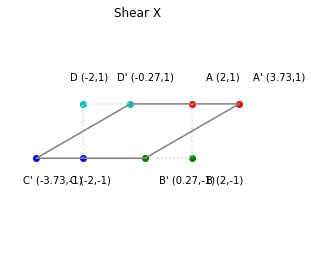

In [69]:
# Shear
shear = lambda phi=0,psi=0: np.array([[1,tan(psi),0],[tan(phi),1,0],[0,0,1]])
draw(M)
draw(M @ shear(pi/3), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear X", linecolor='gray', linestyle='solid')

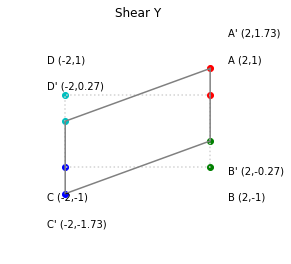

In [70]:
draw(M)
draw(M @ shear(0,pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear Y", linecolor='gray', linestyle='solid')

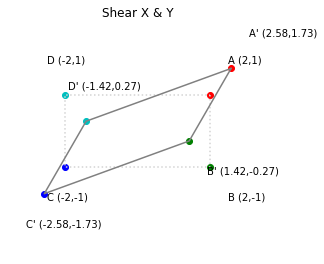

In [71]:
draw(M)
draw(M @ shear(pi/6,pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear X & Y", linecolor='gray', linestyle='solid')

#### Multiple affine transformations

Affine transformations may be combined by multiplying the transformation matrices in order. E.g. Transformation matrix Z is obtained by multiplying the scale, shear and rotation matrices.

\begin{equation*}
  Z =
  \begin{bmatrix}
    2 & 0  & 0 \\ 0 & 3  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  *
  \begin{bmatrix}
    1 & tan(\frac{\pi}{18})  & 0 \\ tan(\frac{\pi}{9}) & 1  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  *
  \begin{bmatrix}
    cos(\frac{\pi}{6}) & sin(\frac{\pi}{6})  & 0 \\ -sin(\frac{\pi}{6}) & cos(\frac{\pi}{6})  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  = 
  \begin{bmatrix}
    2.33 & 1.96  & 0 \\ -0.37 & 2.10  & 0 \\ 0 & 0  & 1
  \end{bmatrix}
  \end{equation*}
  
  
  
\begin{equation*}
  M*Z =
  \begin{bmatrix}
    4.30 & 6.01 & 0  \\ 5.04 & 1.82  & 0 \\ -4.30 & -6.01  & 0 \\ -5.04 & -1.82 & 0
  \end{bmatrix}
  \end{equation*}
  

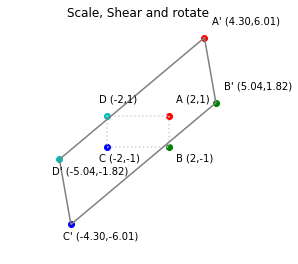

In [72]:
Z = scale(3,2) @ shear(pi/9, pi/18) @ rot(pi/6)
draw(M)
draw(M @ Z, names=[f"{n}'" for n in string.ascii_uppercase], title="Scale, Shear and rotate", linecolor='gray', linestyle='solid')

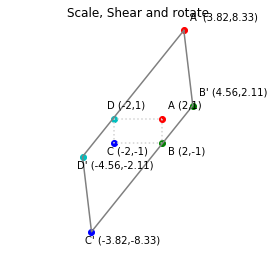

In [73]:
Z = rot(pi/6) @ shear(pi/9, pi/18) @ scale(2,4)
draw(M)
draw(M @ Z, names=[f"{n}'" for n in string.ascii_uppercase], title="Scale, Shear and rotate", linecolor='gray', linestyle='solid')

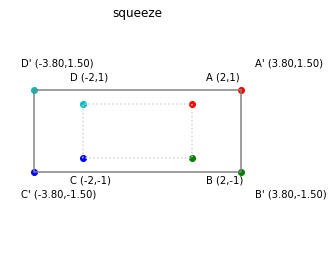

In [74]:
draw(M)
draw(M @ scale(1.9,1.5), names=[f"{n}'" for n in string.ascii_uppercase], title="squeeze", linecolor='gray', linestyle='solid')

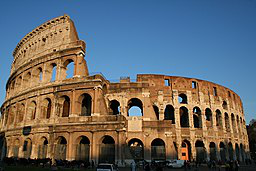

In [130]:
from PIL import Image
import requests
from io import BytesIO
url="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Colosseo_2008.jpg/256px-Colosseo_2008.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Sacred_lotus_Nelumbo_nucifera.jpg/128px-Sacred_lotus_Nelumbo_nucifera.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))#.convert("L")
img

In [0]:
img_in = np.array(img)

In [0]:
h,w,c = img_in.shape

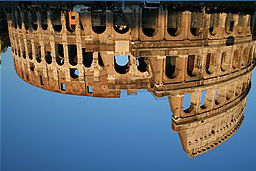

In [133]:
img_out = np.zeros((h,w,c), dtype=np.uint8)
for i, row in enumerate(img_in):
    for j, col in enumerate(row):
        values = img_in[i, j, :]
        coords = np.array([i, j, 1])
        newi, newj, _ = coords @ reflect(-1, -1)
        img_out[newi, newj, :] = values

Image.fromarray(img_out)